<a href="https://colab.research.google.com/github/PranavMGaikwad/LGM-VIPDatascience/blob/main/Task_4_Handwritten_DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing requied Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

**Loading the Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

# Reshaping the traning and testing data.
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # Since mnist dataset is gray scale so we write 1 as a color channel.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

**Normalizing the pixels values of images.**

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

**Plotting the Images**

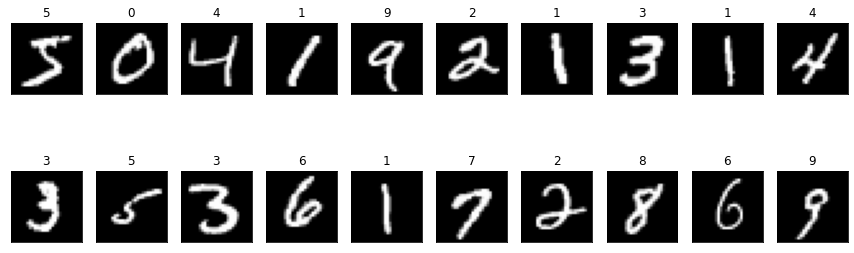

In [ ]:
fig = plt.figure(figsize=(15,5))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [ ]:
# Determining the shape of the input image.

img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


**Neural Network Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)              

**Plotting the Model**

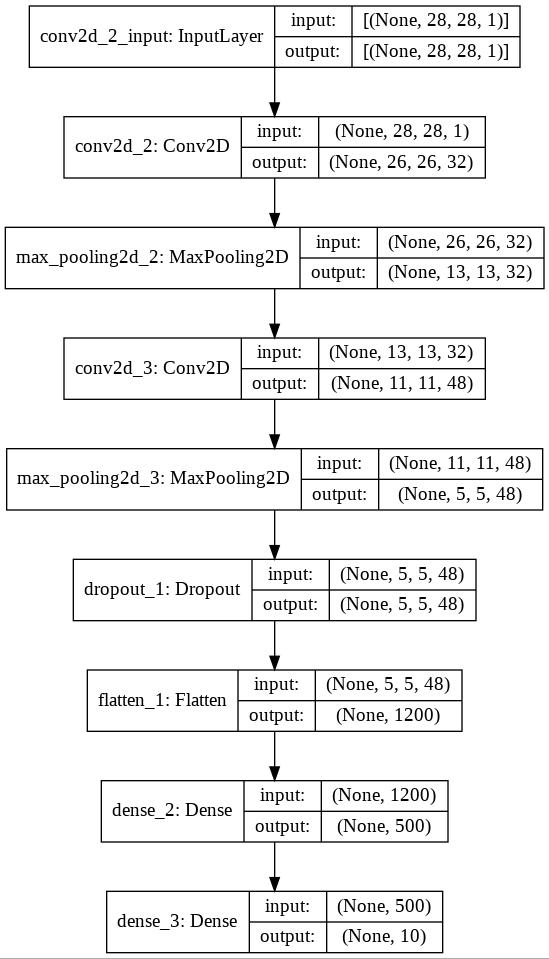

In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

**Compiling the model**

If you are coding in google colab the select the Runtime as GPU or else it will give you an error.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 3s - loss: 0.2381 - accuracy: 0.9265 - val_loss: 0.0715 - val_accuracy: 0.9792
Epoch 2/10
422/422 - 3s - loss: 0.0810 - accuracy: 0.9747 - val_loss: 0.0388 - val_accuracy: 0.9882
Epoch 3/10
422/422 - 3s - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0341 - val_accuracy: 0.9903
Epoch 4/10
422/422 - 3s - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 5/10
422/422 - 3s - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0298 - val_accuracy: 0.9927
Epoch 6/10
422/422 - 3s - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0265 - val_accuracy: 0.9930
Epoch 7/10
422/422 - 3s - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0237 - val_accuracy: 0.9940
Epoch 8/10
422/422 - 3s - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0262 - val_accuracy: 0.9927
Epoch 9/10
422/422 - 3s - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 10/10
422/422 - 3s - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.0279 - val_accuracy: 0.9925

**Testing Accuracy**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy : {accuracy*100}')

Accuracy : 99.37000274658203


**Checking the number and verifying the predicted number is correct or not.**

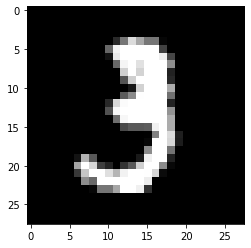

In [ ]:
img = x_train[10]

# Now displaying the sample image.

plt.imshow(np.squeeze(img), cmap='gray')
plt.show()

In [ ]:
img= img.reshape(1,img.shape[0], img.shape[1], img.shape[2])
pred = model.predict([img])
print("the predicted number is : {}".format(argmax(pred)))

the predicted number is : 3


**So our prediction of number is correct!!**